# **Métricas en $\mathbb{R}^n$**

### Objetivo


La finalidad de este trabajo es que sirva de apoyo a quien está comenzando a estudiar análisis matemático, en particular los temas de espacios métricos, series y sucesiones. Para esto se utilizará el lenguaje de programación Python para crear algunas funciones que calculen las métricas usuales en $\mathbb{R}^n$, así como implementaciones de algunas sucesiones y series. También se visualizarán algunos conjuntos y gráficas de sucesiones y series, de modo que el código sea algo interactivo.

## Dependencias

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Definición de métrica y espacio métrico**

Sea $M$ un conjunto y sea $d:M \times M ⟶ \mathbb{R}$ una función. En ese caso, $d$ se dice una métrica (o función distancia) para $M$ si para cualesquiera elementos $x,y \mbox{ y } z$ se cumplen las siguientes propiedades:

1.   $d(x,y) \geq 0 $
2.   $d(x,y) = 0 \mbox{ si y sólo si } x=y$
3.   $d(x,y) = d(y,x) $
4.   $d(x,y) \leq d(x,z)+d(z,y)$

Y en tal caso diremos que la pareja $(M,d)$ es un espacio métrico.

***Observación 1:*** Se puede probar que la propiedad $1$ es consecuencia de las propiedades $2$,$3$ y $4$.

***Observación 2:*** Nótese que una métrica es una función que hace lo que nuestra intuición nos dice, la distancia de un elemento consigo mismo es cero, la distancia de $x$ a $y$ es la misma distancia que la de $y$ a $x$, y queremos la desigualdad del triángulo porque implica que la distancia entre dos puntos siempre debe ser la ruta más corta posible entre esos puntos (lo que es una propiedad intuitiva y natural de la distancia), además de establecer una relación fundamental entre la distancia y la geometría del espacio métrico.

***Nota:*** La noción de espacio métrico fue introducida en 1906 por Maurice Fréchet, y fue desarrollada y acuñada por Felix Hausdorff en 1914.

A continuación veamos algunas métricas para $\mathbb{R}^{n}$:

## **1. Métrica** $d_{1}$

Comunmente atribuida a Minkowski en los labores del siglo XIX, la geometría del Taxista se obtiene cambiando la distancia euclidiana entre dos puntos $(x_1,y_1),(x_2,y_2)$ del plano $\mathbb{R}{^2}$ por: $d((x_1,y_1),(x_2,y_2)=|x_1-y_1|+|x_2-y_2|$

Generalizando esta idea para el espacio métrico $\mathbb{R}^{n}$ se define como:  $$d_1(x,y) = \sum_{j=1}^{n} |x_j-y_j|$$

Y se le conoce conoce como la ***métrica del taxista*** o ***métrica de Manhattan***.

### Implementando la métrica $d_{1}$ con un ciclo for.

In [ ]:
# Veamos un ejemplo, dados dos puntos
x = (1,0,-1)
y = (0,1,5)

# Definimos la métrica d1
def d_1(x:list,y:list):
  aux = []
  n = len(x)
  for k in range(n):
    aux.append(abs(x[k]-y[k]))

  return sum(aux)

print(f"La distancia en la métrica d_1 de {x} a {y} es d1(x,y) = {d_1(x,y)}")

La distancia en la métrica d_1 de (1, 0, -1) a (0, 1, 5) es d1(x,y) = 8


### Implementando la métrica $d_{1}$ con NumPy

In [ ]:
def d1_numpy(x:np.ndarray,y:np.ndarray):
    return sum(abs(x - y))

x = np.array([1,0,-1])
y = np.array([0,1,5])
print(f"La distancia en la métrica d_1 de {tuple(x)} a {tuple(y)} es d1(x,y) = {d1_numpy(x,y)}")

La distancia en la métrica d_1 de (1, 0, -1) a (0, 1, 5) es d1(x,y) = 8


### Dibujando la distancia del taxista de dos puntos

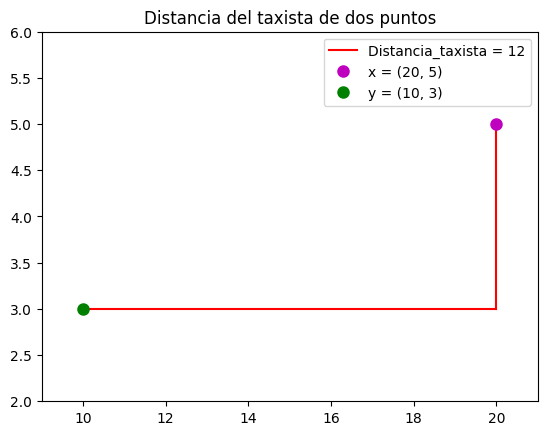

In [ ]:
# Definimos dos puntos
x,y=np.array([20,5]),np.array([10,3])

x1, y1 = x[0], x[1] # 5,2
x2, y2 = x[0], y[1] # 5,7

x3, y3 = x[0], y[1] # 5,7
x4, y4 = y[0], y[1] # 6,7

# Creamos la figura y el eje
fig, ax = plt.subplots()

# Graficamos los segmentos de recta
ax.plot([x1, x2], [y1, y2],color = 'red',label=f"Distancia_taxista = {d1_numpy(x,y)}")
ax.plot([x3, x4], [y3, y4],color = 'red')

# Para ubicar los dos puntos a los cuales estamos calculando la métrica del taxista
plt.plot(x[0], x[1], ls = '', marker = "o", markersize = 8,label=f"x = {tuple(x)}",color='m')
plt.plot(y[0], y[1], ls = '', marker = "o", markersize = 8,label=f"y = {tuple(y)}",color='g')

# Límites de la gráfica
ax.set_xlim([min([x[0],y[0]])-1, max([x[0],y[0]])+1])
ax.set_ylim([min([x[1],y[1]])-1, max([x[1],y[1]])+1])

# Título y leyendas
ax.set_title('Distancia del taxista de dos puntos')
ax.legend(loc="best")

# Mostramos el gráfico
plt.show()

## **2. Métrica** $d_2$
La siguiente métrica tiene sus bases en el teorema de Pitágoras como se muestra en la imagen:

A esta distancia se le suele denominar métrica euclidiana. Se define como

$$ d_{2}(x,y) = \sqrt{\sum_{i=1}^{n}|x_{i}-y_{i}|^{2}} $$

### Implementación de la métrica $d_{2}$

In [ ]:
def metrica_euclidiana(x:np.ndarray,y:np.ndarray):
  return np.sqrt(sum((x - y)**2))

# Algunos ejemplos

vectores_2 = [[np.array([1,2]),np.array([3,4])],[np.array([1,2,3]),np.array([3,4,5])],[np.array([1,0,0]),np.array([0,0,1])]]

datos = [
    {'x': tuple(vectores_2[0][0]),'y': tuple(vectores_2[0][1]) ,'d2(x,y)': metrica_euclidiana(vectores_2[0][0],vectores_2[0][1])},
    {'x': tuple(vectores_2[1][0]),'y': tuple(vectores_2[1][1]) ,'d2(x,y)': metrica_euclidiana(vectores_2[1][0],vectores_2[1][1])},
    {'x': tuple(vectores_2[2][0]),'y': tuple(vectores_2[2][1]), 'd2(x,y)': metrica_euclidiana(vectores_2[2][0],vectores_2[2][1])},
]

df = pd.DataFrame(datos)

df

,x,y,"d2(x,y)"
0,"(1, 2)","(3, 4)",2.828427
1,"(1, 2, 3)","(3, 4, 5)",3.464102
2,"(1, 0, 0)","(0, 0, 1)",1.414214


### Dibujando la distancia euclidiana de dos puntos

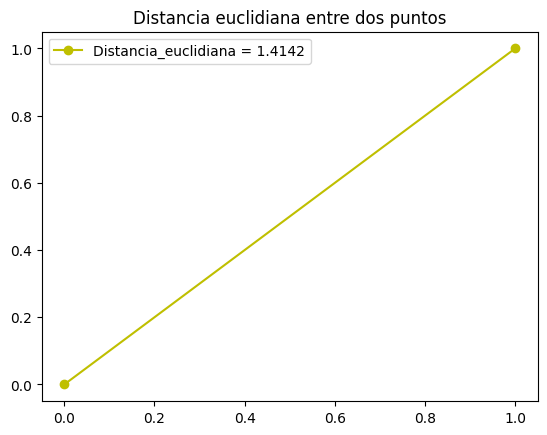

In [ ]:
# Definimos dos puntos
x, y = np.array([0,0]),np.array([1,1])

fig, ax = plt.subplots()

# Dibujamos el segmento de línea entre los dos puntos
ax.plot([x[0], y[0]], [x[1], y[1]], 'o-', label=f"Distancia_euclidiana = {round(metrica_euclidiana(x,y),4)}", color = 'y')

# Título y leyendas
ax.set_title("Distancia euclidiana entre dos puntos")
ax.legend(loc="best")

# Mostramos el gráfico
plt.show()

## **3. Métricas** $d_p$ (***métrica de Minkowski***)

Esta métrica es una generalización de la distancia euclidiana y la distancia de Manhattan.

Para $p \in [1,∞)$, la $p-métrica$ se define de la siguiente manera:

$$ d_{p}(x,y)= \left(\sum_{i=1}^{n}|x_{i}-y_{i}|^{p} \right)^{\frac{1}{p}} $$

### Implementación de la métrica $d_{p}$

In [ ]:
def metrica_p(x:np.ndarray,y:np.ndarray,p:int):
    return np.power(sum(abs(x - y)**p),1/p)

# Algunos ejemplos

vectores_p = [[np.array([1,0,0]),np.array([0,0,1]),2],[np.array([1,0,0]),np.array([0,0,1]),5],[np.array([1,0,0]),np.array([0,0,1]),8],
              [np.array([10,2]),np.array([4,7]),1]]

datos = [
    {'p':vectores_p[0][2],'x': tuple(vectores_p[0][0]),'y': tuple(vectores_p[0][1]) ,'dp(x,y)': metrica_p(vectores_p[0][0],vectores_p[0][1],vectores_p[0][2])},
    {'p':vectores_p[1][2],'x': tuple(vectores_p[1][0]),'y': tuple(vectores_p[1][1]) ,'dp(x,y)': metrica_p(vectores_p[1][0],vectores_p[1][1],vectores_p[1][2])},
    {'p':vectores_p[2][2],'x': tuple(vectores_p[2][0]),'y': tuple(vectores_p[2][1]), 'dp(x,y)': metrica_p(vectores_p[2][0],vectores_p[2][1],vectores_p[2][2])},
    {'p':vectores_p[3][2],'x': tuple(vectores_p[3][0]),'y': tuple(vectores_p[3][1]), 'dp(x,y)': metrica_p(vectores_p[3][0],vectores_p[3][1],vectores_p[3][2])}
]

df = pd.DataFrame(datos)

df

,p,x,y,"dp(x,y)"
0,2,"(1, 0, 0)","(0, 0, 1)",1.414214
1,5,"(1, 0, 0)","(0, 0, 1)",1.148698
2,8,"(1, 0, 0)","(0, 0, 1)",1.090508
3,1,"(10, 2)","(4, 7)",11.000000


## **4. Métrica** $d_{∞}$ (***métrica máxima o distancia de Chebyshev***)

La distancia de Chebyshev toma su nombre del matemático ruso Pafnouti Chebyshev.

Es la distancia entre dos puntos dada por la diferencia máxima entre sus coordenadas. Se define como

$$ d_{∞}(x,y) = \max{\{|x_{i}-y_{i}|: 1 \leq i \leq n\}} $$

***Observación:*** La distancia de Chebyshev es equivalente a la distancia de Minkowski cuando $p \rightarrow ∞$.

### Implementación de la métrica $d_{∞}$

In [ ]:
def metrica_max(x:np.ndarray,y:np.ndarray):
    return max(abs(x - y))

# Algunos ejemplos

vectores_max = [[np.array([1,0,0]),np.array([0,0,1])],[np.array([2,0,0]),np.array([0,0,1])],[np.array([1,5,0]),np.array([0,0,1])],[np.array([1,7,0]),np.array([8,0,1])]]

datos = [(tuple(vectores_max[i][0]), tuple(vectores_max[i][1]), metrica_max(vectores_max[i][0], vectores_max[i][1])) for i in range(len(vectores_max))]

df = pd.DataFrame(datos, columns=['x', 'y', 'd_max(x,y)'])

df

,x,y,"d_max(x,y)"
0,"(1, 0, 0)","(0, 0, 1)",1
1,"(2, 0, 0)","(0, 0, 1)",2
2,"(1, 5, 0)","(0, 0, 1)",5
3,"(1, 7, 0)","(8, 0, 1)",7


### Dibujando la distancia máxima de dos puntos

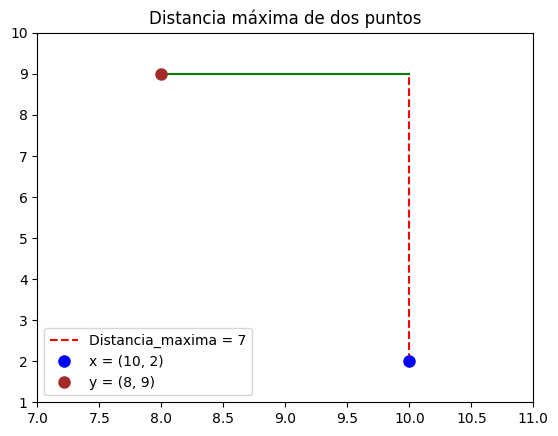

In [ ]:
# Definimos dos puntos
x,y=np.array([10,2]),np.array([8,9])

x1, y1 = x[0], x[1]
x2, y2 = x[0], y[1]

x3, y3 = x[0], y[1]
x4, y4 = y[0], y[1]

# Creamos la figura y el eje
fig, ax = plt.subplots()

# Graficamos los segmentos de recta
if abs(x3-x4)<abs(y1-y2):
  ax.plot([x1, x2], [y1, y2], ls="--",color = 'red',label=f"Distancia_maxima = {metrica_max(x,y)}")
  ax.plot([x3, x4], [y3, y4],color = 'green')
else:
  ax.plot([x1, x2], [y1, y2],color = 'red')
  ax.plot([x3, x4], [y3, y4],ls="--",color = 'green',label=f"Distancia_maxima = {metrica_max(x,y)}")

# Para ubicar los dos puntos a los cuales estamos calculando la métrica del taxista
plt.plot(x[0], x[1], ls = '', marker = "o", markersize = 8,label=f"x = {tuple(x)}",color='blue' )
plt.plot(y[0], y[1], ls = '', marker = "o", markersize = 8,label=f"y = {tuple(y)}",color='brown' )

# Límites de la gráfica
ax.set_xlim([min([x[0],y[0]])-1, max([x[0],y[0]])+1])
ax.set_ylim([min([x[1],y[1]])-1, max([x[1],y[1]])+1])

# Título y leyendas
ax.set_title('Distancia máxima de dos puntos')
ax.legend(loc="best")

# Mostramos el gráfico
plt.show()

## **Definición de bola abierta**

Sea $(M,d)$ un espacio métrico. Para un punto $x_{0}$ y real $r>0$, se define la *bola abierta con centro en $x_{0}$ y radio $r$* como el conjunto

$$ B(x_{0},r) = \{x \in M: d(x_{0},x)<r\} $$

## **Dibujo de $B_{p}((0,0),1)=\{x \in \mathbb{R}^{2}:d_{p}(x,(0,0))<1\}$**

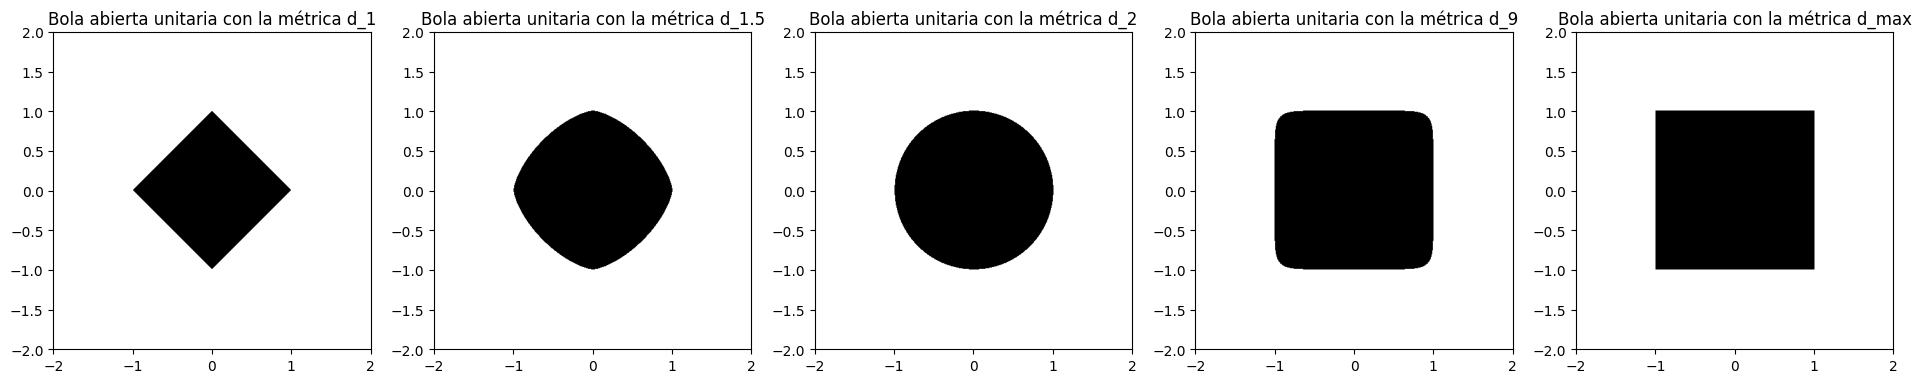

In [ ]:
def Bp(x:np.ndarray,y:np.ndarray,p:list):
  # Creamos una cuadrícula de puntos de la forma (x,y) (producto cartesiano de 'x' y 'y')
  X, Y = np.meshgrid(x, y)

  # Calculamos para cada gráfico
  aux = []
  for p_s in p:
    if p_s != "max":
      metrica_p = (abs(X)**p_s + abs(Y)**p_s)**(1/p_s)
      auxiliar = metrica_p < 1
      aux.append(auxiliar)
    else:
      metrica_p = np.maximum(abs(X),abs(Y))
      auxiliar = metrica_p < 1
      aux.append(auxiliar)

  # Creamos una figura y subplots
  fig, axs = plt.subplots(1, len(p))

  # Graficamos los datos en cada subplot
  for i in range(len(aux)):
    axs[i].imshow(aux[i], extent=[-2, 2, -2, 2], cmap='binary')
    axs[i].set_title(f'Bola abierta unitaria con la métrica d_{p[i]}')

  # Ajustamos y mostramos el gráfico
  plt.subplots_adjust(right=3)
  plt.show()

# Generamos dos arrays
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)

# Aplicamos la función
Bp(x,y,[1,1.5,2,9,"max"])

# **Convergencia**

## Definición de una sucesión

Sea $M$ un espacio métrico. Por una sucesión en el espacio $M$, entendemos una función $x: \mathbb{Z}^{+} ⟶ M$ para la cual se acostumbra escribir
$$ x_{i} = x(i) $$
De manera alternativa, se acostumbra escribir una sucesión como
$$ x=\{x_{i}\}_{i \in \mathbb{Z}^{+}}$$

## Definición de una subsucesión

Una subsucesión de $x=\{x_{i}\}_{i \in \mathbb{Z}^{+}}$ es la composición de $x$ con una función estrictamente creciente $i:\mathbb{Z}^{+} ⟶ \mathbb{Z}^{+}$. Su $j-\mbox{ésimo}$ término se denota por
$$ x_{i_{j}} = x(i(j)) $$

## Definición de sucesión convergente

Sea $M$ un espacio métrico y sea $\{x_{i}\}_{i \in \mathbb{Z}^{+}}$ una sucesión en tal espacio. Diremos que la sucesión es *convergente en $M$* al punto $x$ si: Para cada $ɛ>0$ existe $\nu \in \mathbb{Z}^{+}$ tal que, cuando $i>\nu$,
$$ d(x_{i},x)<ɛ $$

Si existe un punto $x$ de forma que la sucesión es convergente al punto $x$, diremos que la sucesión es convergente.

Ideas:
- Dar algunas definiciones y ejemplos.
- Implementar algunos ejemplos.
- Graficar la convergencia de algunas sucesiones.

 **Ejemplo:**
Si definimos la sucesión $\{a_{n}\}_{n \in \mathbb{Z}^{+}}$ como

$$ a_{1} = 1, \quad a_{n+1} = 1 + \frac{1}{1+a_{n}} \quad \mbox{para} \quad n>1 $$

Entonces,
$$ \lim_{n \to ∞}a_{n} = \sqrt{2} $$



### Implementación de la sucesión $\{a_{n}\}_{n \in \mathbb{Z}^{+}}$

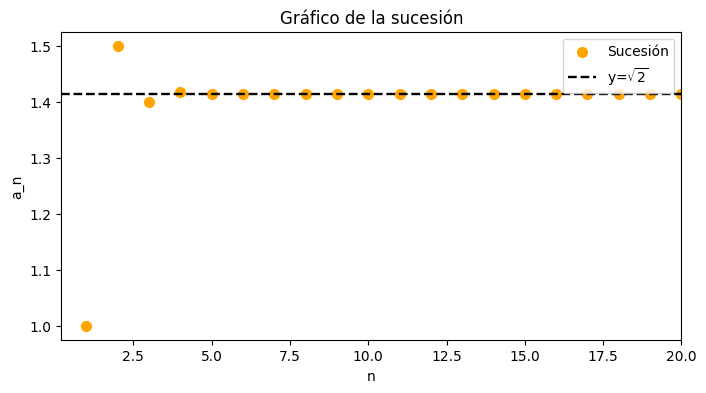

In [ ]:
# Definimos la sucesión
def raiz_dos(n):
  if n==1:
    return 1
  else:
    return 1 + 1/(1+raiz_dos(n-1))

# Creamos puntos para evaluarlos en la función
n = np.arange(1, 100)

# Guardamos los valores de la sucesión en una lista
sucesion = [raiz_dos(i) for i in n]

# Para las leyendas, título y tamaño del gráfico
graf = [{'xlabel':'n','ylabel':'a_n','xlim':(0.2,20)},{'title':'Gráfico de la sucesión','legend':True,'legend_loc':'upper right','figsize':(8,4)}]

# Damos formato a la gráfica
plt.scatter(n, sucesion, label='Sucesión',c="orange",marker="o",s=50)
plt.xlabel(graf[0]['xlabel'])
plt.ylabel(graf[0]['ylabel'])
plt.xlim(graf[0]['xlim'])
plt.axhline(y=math.sqrt(2), color='black', linewidth=1.7, linestyle = "--",label="y=$\sqrt{2}$")
plt.title(graf[1]['title'])
plt.legend(loc=graf[1]['legend_loc'])
plt.gcf().set_size_inches(graf[1]['figsize'])

# Mostramos el gráfico
plt.show()

**Ejemplo:** Si definimos la sucesión $\{b_{n}\}_{n \in \mathbb{Z}^{+}}$ como

$$ b_{n} = 1 + \frac{1}{2} +  \frac{1}{3} + \ldots + \frac{1}{n} - \log(n) = \sum_{i=1}^{n} \frac{1}{i} - \log(n)$$

Se sigue que

$$ γ = \lim_{n \to ∞}\left(\sum_{i=1}^{n} \frac{1}{i} - \log(n)\right) $$

Donde $γ$ es el número de Euler.

### Implementación de la sucesión $\{b_{n}\}_{n \in \mathbb{Z}^{+}}$

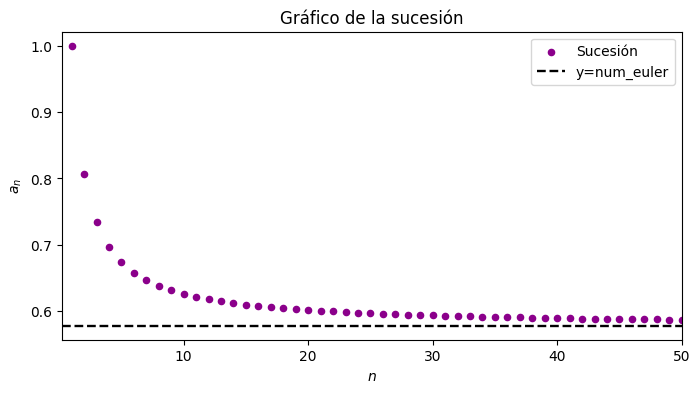

In [ ]:
# Definimos la sucesión
def Euler_Mascheroni(n):
  return sum([1/i for i in range(1,n+1)]) - np.log(n)

# Creamos puntos para evaluarlos en la función
n = np.arange(1, 500)

# Guardamos los valores de la sucesión en una lista
sucesion = [Euler_Mascheroni(i) for i in n]

# Para las leyendas, título y tamaño del gráfico
graf = [{'xlabel':'$n$','ylabel':'$a_n$','xlim':(0.2,50)},{'title':'Gráfico de la sucesión','legend':True,'legend_loc':'upper right','figsize':(8,4)}      ]

# Damos formato a la gráfica
plt.scatter(n, sucesion, label='Sucesión',c="darkmagenta",marker="o",s=20)
plt.xlabel(graf[0]['xlabel'])
plt.ylabel(graf[0]['ylabel'])
plt.xlim(graf[0]['xlim'])
plt.axhline(y=0.57721566490153286060651209008240243104215933593992, color='black', linewidth=1.7, linestyle = "--",label="y=num_euler")
plt.title(graf[1]['title'])
plt.legend(loc=graf[1]['legend_loc'])
plt.gcf().set_size_inches(graf[1]['figsize'])

# Mostramos el gráfico
plt.show()

**Ejemplo:** Si definimos la sucesión

$$ \{f_{n}(x)\}_{n \in \mathbb{Z}^{+}} = \left\{\frac{sen(nx)}{n}: n \in \mathbb{Z}^{+} \right\} $$

Entonces tenemos que

$$ \lim_{n \to ∞}f_{n}(x) = 0 $$

### Implementación de la sucesión $\{f_{n}(x)\}_{n \in \mathbb{Z}^{+}}$

<function matplotlib.pyplot.show(close=None, block=None)>

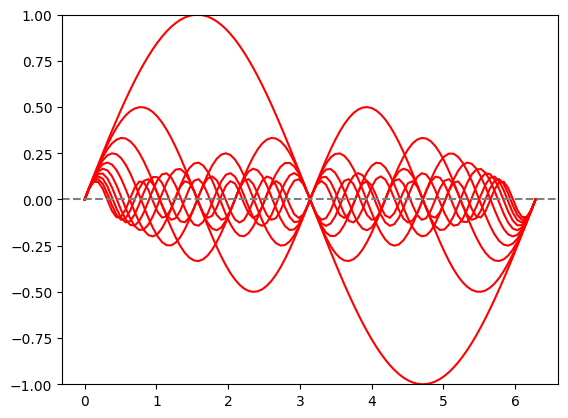

In [ ]:
# Definimos la función, y damos valores para x y n
x = np.linspace(0, 2*np.pi, 100)
n_val = np.array([1,2,3,4,5,6,7,8,9,10])

# Con esto podemos todas las gráficas juntas
plt.figure()

for n in n_val:
  y = np.sin(n*x)/n
  plt.plot(x,y,color='r')

# Recta y=0
plt.axhline(y=0, color='gray', linestyle='--')

# Limitamos el eje 'y'
plt.ylim(-1,1)

# Mostramos el gráfico
plt.show

**Ejemplo:** Si definimos la sucesión

$$ \{g_{n}(x)\}_{n \in \mathbb{Z}^{+}} = \left\{x^{n}: n \in \mathbb{Z}^{+} \right\} $$

Se tiene que

$$ \lim_{n \to ∞}g_{n}(x) = g(x) $$

Donde

$$ g(x)= \left\{ \begin{array}{lcc}
             0 &   si  & 0 \leq x < 1 \\
             \\ 1 &  si & x=1 \\
             \end{array}
   \right. $$

### Implementación de la sucesión $\{g_{n}(x)\}_{n \in \mathbb{Z}^{+}}$

<function matplotlib.pyplot.show(close=None, block=None)>

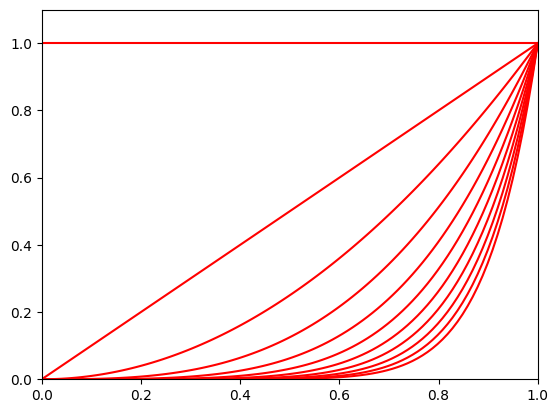

In [ ]:
# Definimos la función, y damos valores para x y n
x = np.linspace(0, 1, 100)
n_val = np.array([0,1,2,3,4,5,6,7,8,9,10])

# Con esto podemos todas las gráficas juntas
plt.figure()

for n in n_val:
  y = np.power(x,n)
  plt.plot(x,y,color='r')

# Limitamos el eje 'x' e 'y'
plt.ylim(0,1.1)
plt.xlim(0,1)

# Mostramos el gráfico
plt.show

## Series

- Definición de serie
- Ejemplos y algunos resultados

## Definición de suma parcial

Sea $V$ un espacio vectorial y sea $\{v_{i}\}_{i \in \mathbb{Z}^{+}}$ una sucesión en tal espacio. La *suma parcial* hasta el paso $j$ se define como

$$ s_{j} = \sum_{i=1}^{j} v_{i} $$

## Definición de serie

Sea $V$ un espacio vectorial y sea $v=\{v_{i}\}_{i \in \mathbb{Z}^{+}}$ una sucesión en tal espacio. La *serie definida por la sucesión $v$* es la sucesión $\{s_{j}\}_{j \in \mathbb{Z}^{+}}$ donde $s_{j}$ es la suma parcial hasta el paso $j$ de la sucesión.

Si la sucesión $\{s_{j}\}_{j \in \mathbb{Z}^{+}}$ de *sumas parciales* converge se dice que la sucesión $\sum_{i=1}^{\infty} v_{i}$ es *sumable o convergente.*

Si $$\lim_{j \rightarrow \infty} s_{j} = s$$  se escribe $$\sum_{i=1}^{\infty}v_{i} =  \lim_{j \rightarrow \infty} s_{j} = s$$

Si no existe $\lim_{j \rightarrow \infty} s_{j}$ se dice que $\sum_{i=1}^{\infty} v_{i}$ es divergente.

**Ejemplo:** Una serie muy conocido es la serie geométrica $$\sum_{k=1}^{\infty} r^{k}$$ la cual converge si $|r|<1$, y diverge en el otro caso.

Como $$S_{n}= \sum_{k=1}^{n} r^{k} = \frac{1 - r^{n+1}}{1-r}$$
tenemos que el
$$ \lim_{n \rightarrow \infty} S_{n} = \lim_{n \rightarrow \infty} \left ( \frac{1 - r^{n+1}}{1-r} \right ) =  \frac{1}{1-r} $$ para $|r|<1$.
Por lo que $$\sum_{k=1}^{\infty} r^{k} =  \frac{1}{1-r} $$

### Implementación de una serie geométrica

$$ \sum_{k=0}^{∞} \frac{1}{e^{k}} =1 \frac{1}{1-\frac{1}{e}}= \frac{e}{e-1} $$



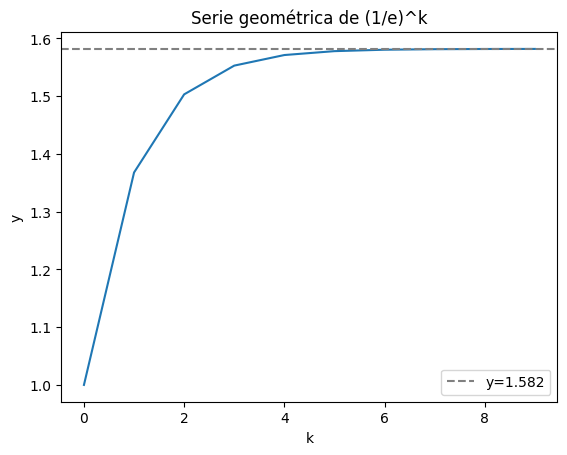

In [ ]:
import matplotlib.pyplot as plt
import math

# Definir la función para la serie geométrica
def s_geo(k):
    return sum(math.pow(1/math.e, k) for k in range(k+1))

# Crear una lista de valores para k
k_values = range(0, 10)

# Calcular los valores de la serie geométrica para los valores de k
y_values = [s_geo(i) for i in k_values]

# Crear la gráfica
plt.plot(k_values, y_values)

plt.axhline(y=1.582,color='grey',linestyle="--",label="y=1.582")

# Agregar etiquetas a los ejes y al gráfico
plt.title('Serie geométrica de (1/e)^k')
plt.xlabel('k')
plt.ylabel('y')
plt.legend()

# Mostrar la gráfica
plt.show()

### Implementación de una serie de Leibniz

$$ \sum_{n=0}^{∞} (-1)^{n}\frac{1}{2n+1} =1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} - \ldots \hspace{0.2cm}= \hspace{0.2cm} \frac{π}{4} $$

Valor real: 	 0.7853981633974483
Aproximación: 	 0.7853881633974508


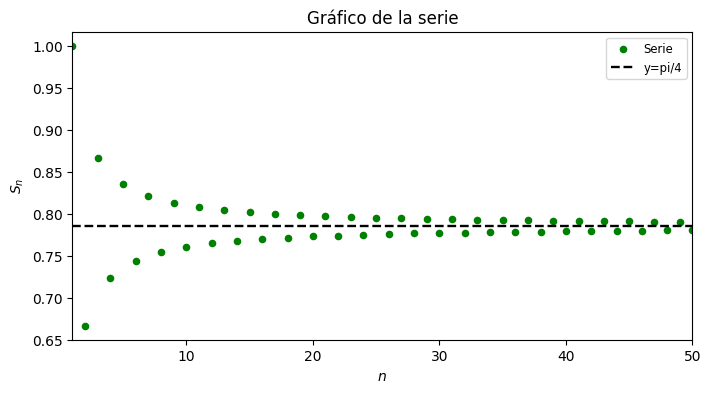

In [ ]:
# Inicializamos la serie que vamos a sumar
serie = 0
# Inicializamos el denominador
denominador = 1
# Inicializamos el índice con que vamos a crear los signos
n = 0
# Creamos una lista para guardar los valores de cada iteración
serie_aux = []
# Creamos una lista para guardar los valores del índice
valores_n = []
while np.abs(serie-np.pi/4)>0.00001:
  serie += (-1)**n / denominador
  denominador += 2
  n += 1
  serie_aux.append(serie)
  valores_n.append(n)

pi_4 = np.pi/4
print("Valor real: \t",pi_4)
print("Aproximación: \t",serie)

# Gráfica de la serie
graf = [{'xlabel':'$n$','ylabel':'$S_n$','xlim':(1,50)},{'title':'Gráfico de la serie','legend':True,'legend_loc':'best','figsize':(8,4)}      ]

# Damos formato a la gráfica
plt.scatter(valores_n, serie_aux, label='Serie',c="g",marker="o",s=20)
plt.xlabel(graf[0]['xlabel'])
plt.ylabel(graf[0]['ylabel'])
plt.xlim(graf[0]['xlim'])
plt.axhline(y=pi_4, color='black', linewidth=1.7, linestyle = "--",label="y=pi/4")
plt.title(graf[1]['title'])
plt.legend(loc=graf[1]['legend_loc'], fontsize='small')
plt.gcf().set_size_inches(graf[1]['figsize'])

# Mostramos el gráfico
plt.show()


##Referencias:

1. Clapp M. (2013). *Introducción al análisis real*. México: Instituto de Matemáticas: UNAM.

2. Giles, J.R. (1987).*Introduction to the analysis of metric spaces*. Lectures Series 3, Cambridge University
Press.

3. Spivak, M.(2003).*Calculus*, 2ª ed. México: Reverté.